In [1]:
# numerical computation
import numpy as np

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# import sklearn
from sklearn.preprocessing import LabelEncoder

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":15})     

# dataframe management
import pandas as pd

from operator import itemgetter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from IPython.display import clear_output

In [2]:
crg_1000 = pd.read_csv('./datasets/matrix_CRG1000.csv')
crg_1000.head()

,Edad,Sexo,001,002,003,004,005,006,007,008,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
crg_1000.shape

(46835, 2265)

#### Controlamos si hay algún valor nulo con:

In [4]:
Edad = crg_1000[crg_1000.columns[0:1]]
columnas_Edad = list(Edad.columns.values)

Genero = crg_1000[crg_1000.columns[1:2]]
columnas_Genero = list(Genero.columns.values)

Diagnostico = crg_1000[crg_1000.columns[2:1519]]
columnas_Diagnostico = list(Diagnostico.columns.values)

Farmacia = crg_1000[crg_1000.columns[1519:]]
columnas_Farmacia = list(Farmacia.columns.values)

N_Pacientes = crg_1000.shape[0]

In [5]:
print(Edad.isnull().any().any())
print(Genero.isnull().any().any())
print(Diagnostico.isnull().any().any())
print(Farmacia.isnull().any().any())

False
False
False
False


#### Ahora con Género

In [6]:
femenino = Genero[Genero == 2]
femenino = femenino.fillna(value =0)

masculino = Genero[Genero == 1]
masculino = masculino.fillna(value =0)

femenino = femenino['Sexo'].tolist()
Genero.insert(1, 'Femenino', femenino)

masculino = masculino['Sexo'].tolist()
Genero.insert(2, 'Masculino', masculino)

del(Genero['Sexo'])
Genero = (Genero>0.0)*1

### Ahora que tenemos todos los datos bien estructurados, vamos a volver a juntarlos

In [7]:
crg_1000_new = pd.concat([Edad, Genero, Diagnostico, Farmacia], axis = 1)
columnas_data =list(crg_1000_new.columns.values)
print(crg_1000_new.shape)
crg_1000_new.head()

(46835, 2266)


,Edad,Femenino,Masculino,001,002,003,004,005,006,007,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
crg_1000_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,46835.0,26.340237,15.658895,1.0,12.0,27.0,37.0,98.0
Femenino,46835.0,0.526294,0.499313,0.0,0.0,1.0,1.0,1.0
Masculino,46835.0,0.473706,0.499313,0.0,0.0,0.0,1.0,1.0
001,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,46835.0,0.000235,0.021174,0.0,0.0,0.0,0.0,3.0
004,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,46835.0,0.000448,0.045508,0.0,0.0,0.0,0.0,6.0


In [9]:
edad = crg_1000_new[crg_1000_new.columns[:1]]
columnas_edad = list(edad.columns.values)

genero = crg_1000_new[crg_1000_new.columns[1:3]]
columnas_genero = list(genero.columns.values)

diagnostico = crg_1000_new[crg_1000_new.columns[3:1520]]
columnas_diagnostico = list(diagnostico.columns.values)

farmacia = crg_1000_new[crg_1000_new.columns[1520:]]
columnas_farmacia = list(farmacia.columns.values)

In [10]:
enfermedades = diagnostico[diagnostico.columns[:999]]
columnas_enfermedades = list(enfermedades.columns.values)

codigo_v = diagnostico[diagnostico.columns[999:1090]]
columnas_codigo_v = list(codigo_v.columns.values)
codes_e = list(diagnostico[diagnostico.columns[1090:1319]].columns.values)

In [11]:
N_mujeres = crg_1000_new[crg_1000_new['Femenino']==1].shape[0]
print(N_mujeres)

print('Porcenjate Mujeres: %.3f'% round((N_mujeres/N_Pacientes)*100, 3))

N_hombres = crg_1000_new[crg_1000_new['Masculino']==1].shape[0]
print(N_hombres)
print('Porcenjate Hombres: %.3f'% round((N_hombres/N_Pacientes)*100, 3))


24649
Porcenjate Mujeres: 52.629
22186
Porcenjate Hombres: 47.371


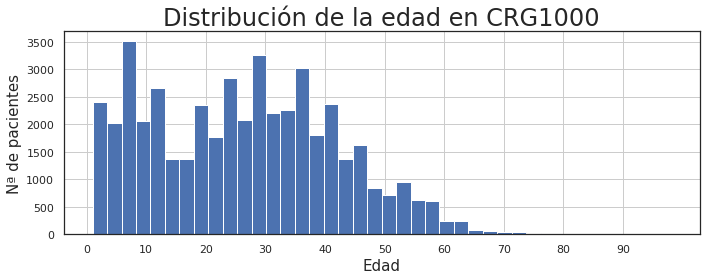

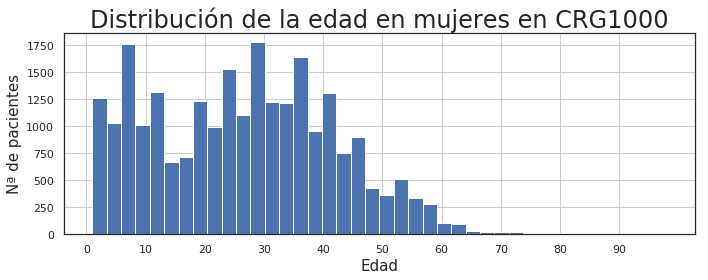

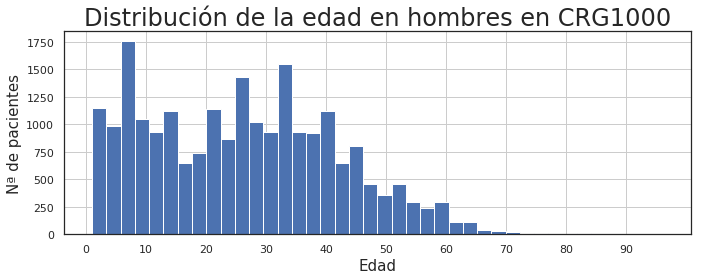

In [12]:
C = crg_1000_new[crg_1000_new.columns[:1]]
plt.figure(figsize=(10,4))
plt.hist(C.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en CRG1000')
plt.savefig("pictures/CRG1000/CRG1000_EDAD.png")
plt.tight_layout()
plt.show()

A = crg_1000_new[crg_1000_new.columns[:1]][crg_1000_new.Femenino==1]
plt.figure(figsize=(10,4))
plt.hist(A.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en mujeres en CRG1000')
plt.savefig("pictures/CRG1000/CRG1000_EDAD_mujeres.png")
plt.tight_layout()
plt.show()

B = crg_1000_new[crg_1000_new.columns[:1]][crg_1000_new.Masculino==1]
plt.figure(figsize=(10,4))
plt.hist(B.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en hombres en CRG1000')
plt.savefig("pictures/CRG1000/CRG1000_EDAD_HOMBRES.png")
plt.tight_layout()
plt.show()

# Ocurrencia

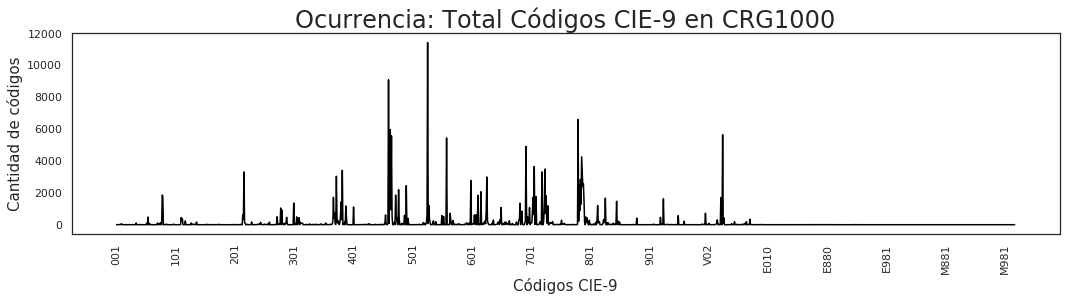

In [13]:
ploting = crg_1000_new[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')
plt.xlabel('Códigos CIE-9')
plt.tight_layout()
plt.title('Ocurrencia: Total Códigos CIE-9 en CRG1000')

plt.savefig("pictures/CRG1000/CRG1000_O_CIE.png")     
plt.show()

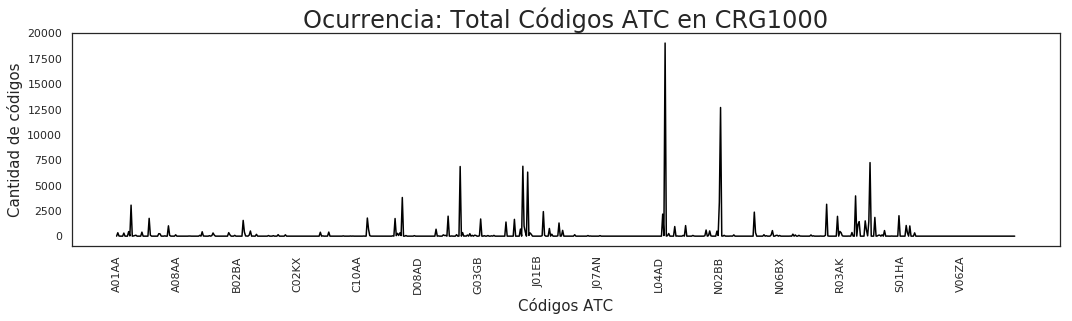

In [14]:
ploting = crg_1000_new[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')
plt.tight_layout()
plt.xlabel('Códigos ATC')
plt.title('Ocurrencia: Total Códigos ATC en CRG1000')

plt.savefig("pictures/CRG1000/CRG1000_O_ATC.png")     
plt.show()

## Ocurrencia de códigos CIE-9 según el genero

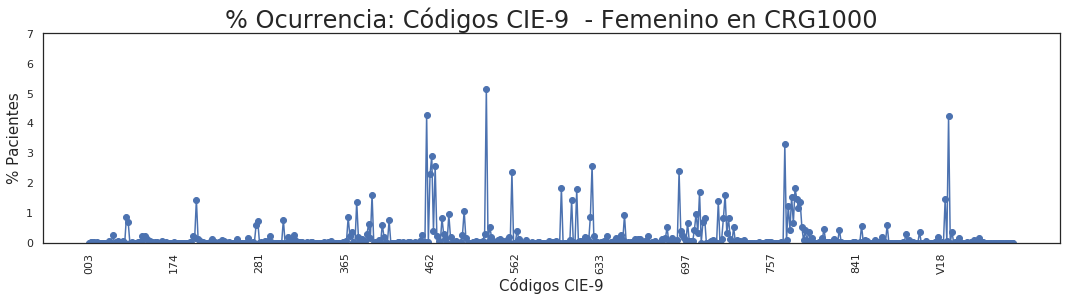

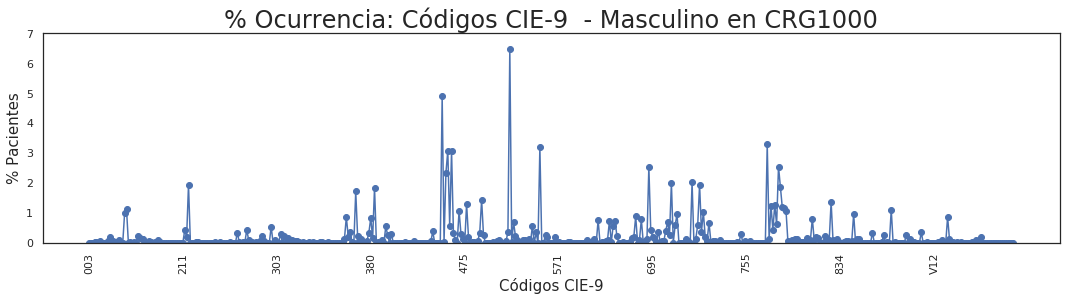

In [15]:
for g in columnas_genero:
    A = crg_1000_new[columnas_diagnostico][crg_1000_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        plt.ylim(0.0, 7.0)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.tight_layout()
        plt.title('% Ocurrencia: Códigos CIE-9  - {} en CRG1000'.format(g))
        
        plt.savefig("pictures/CRG1000/CRG1000_O_CIE_{}.png".format(g))        
        plt.show()


In [16]:
for g in columnas_genero:
    A = crg_1000_new[columnas_codigo_v][crg_1000_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_codigo_v, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
V25     59.882870
V22     20.656418
V27      5.295266
V16      2.818448
V71      2.220595
Grupos mayoritarios para Masculino
            Valor
Código           
V25     53.022578
V71     11.653314
V26      7.283321
V65      5.608157
V16      5.316824


## Ocurrencia  de ATC según el genero

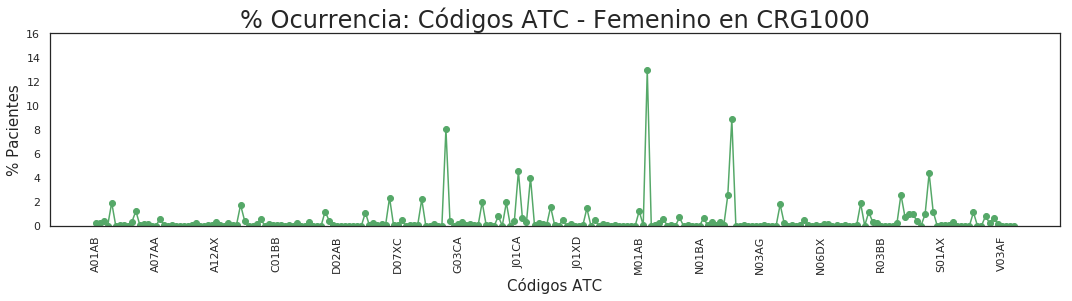

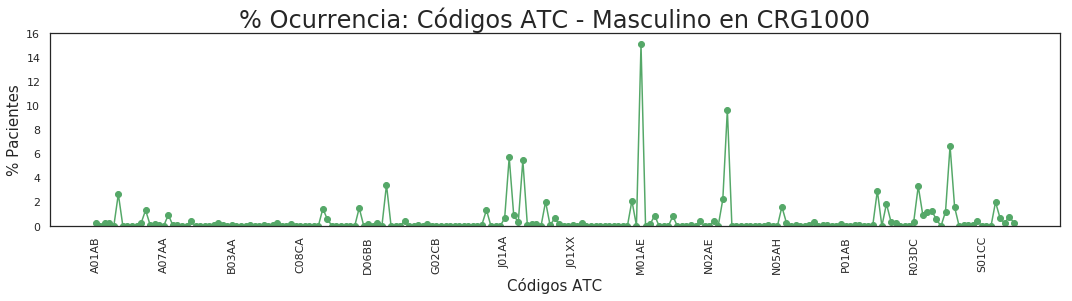

In [17]:
for g in columnas_genero:
    A = crg_1000_new[columnas_farmacia][crg_1000_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        plt.ylim(0.0, 16.0)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.tight_layout()
        plt.title('% Ocurrencia: Códigos ATC - {} en CRG1000'.format(g))
        
        plt.savefig("pictures/CRG1000/CRG1000_O_ATC_{}.png".format(g))        
        plt.show()

In [18]:
for g in columnas_genero:
    A = crg_1000_new[columnas_farmacia][crg_1000_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
M01AE   12.964160
N02BE    8.878257
G03AA    8.054259
J01CA    4.536104
R06AX    4.366838
Grupos mayoritarios para Masculino
            Valor
Código           
M01AE   15.087388
N02BE    9.664620
R06AX    6.666037
J01CA    5.715635
J01CR    5.460557


--------------------------------------------------------------

# Presencia

In [19]:
presencia = (crg_1000_new[crg_1000_new.columns[3:]]>0)*1
crg_1000_new_P = pd.concat([Edad, Genero, presencia], axis = 1)

In [20]:
crg_1000_new_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,46835.0,26.340237,15.658895,1.0,12.0,27.0,37.0,98.0
Femenino,46835.0,0.526294,0.499313,0.0,0.0,1.0,1.0,1.0
Masculino,46835.0,0.473706,0.499313,0.0,0.0,0.0,1.0,1.0
001,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,46835.0,0.000149,0.012225,0.0,0.0,0.0,0.0,1.0
004,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,46835.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,46835.0,0.000128,0.011318,0.0,0.0,0.0,0.0,1.0


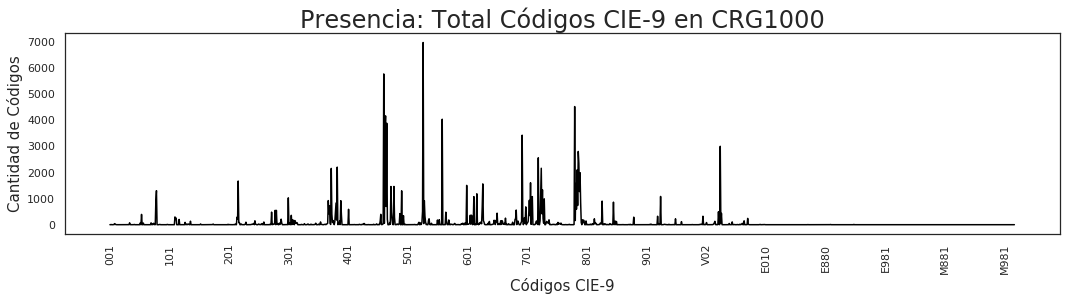

In [21]:
ploting = crg_1000_new_P[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de Códigos')        
plt.xlabel('Códigos CIE-9')
plt.tight_layout()
plt.title('Presencia: Total Códigos CIE-9 en CRG1000')

plt.savefig("pictures/CRG1000/CRG1000_P_CIE.png")     
plt.show()

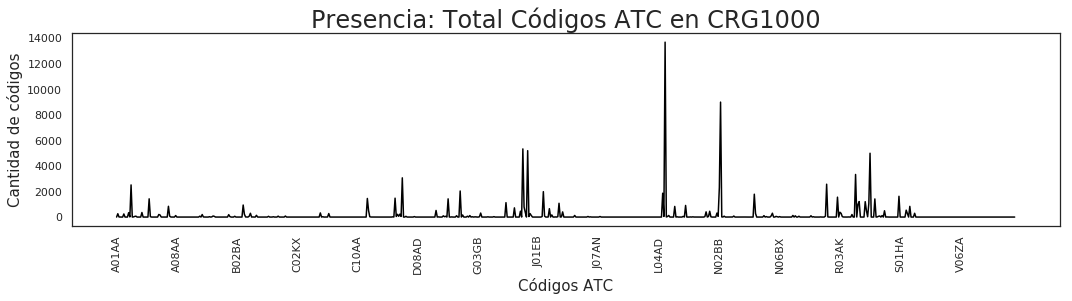

In [22]:
ploting = crg_1000_new_P[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos ATC')
plt.tight_layout()
plt.title('Presencia: Total Códigos ATC en CRG1000')

plt.savefig("pictures/CRG1000/CRG1000_P_ATC.png")     
plt.show()

## Presencia de diagnosticos según el grupo de edad y genero

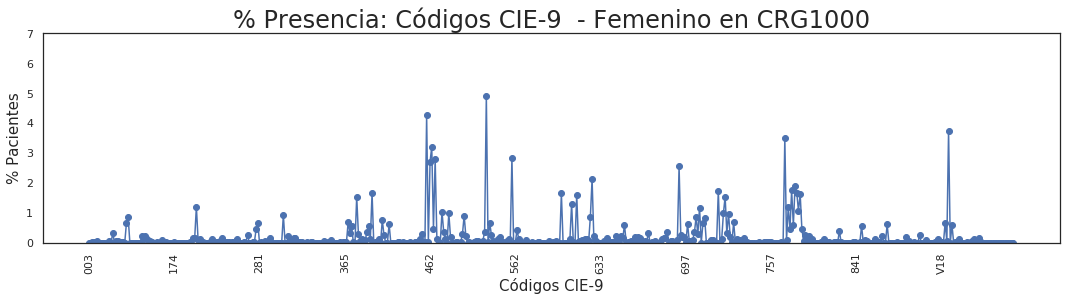

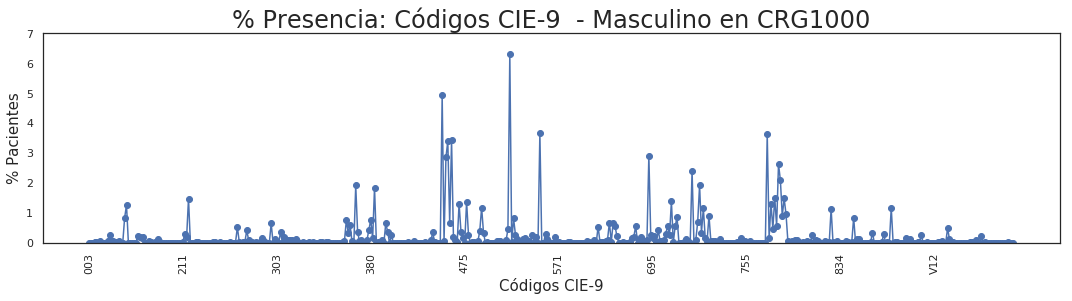

In [23]:
for g in columnas_genero:
    A = crg_1000_new_P[columnas_diagnostico][crg_1000_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        plt.ylim(0.0, 7.0)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.tight_layout()
        plt.title('% Presencia: Códigos CIE-9  - {} en CRG1000'.format(g))
        
        plt.savefig("pictures/CRG1000/CRG1000_P_CIE_{}.png".format(g))        
        plt.show()



In [24]:
for g in columnas_genero:
    A = crg_1000_new_P[columnas_diagnostico][crg_1000_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_diagnostico, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
526     4.912238
460     4.266645
V25     3.730243
780     3.506401
463     3.202031
Grupos mayoritarios para Masculino
           Valor
Código          
526     6.314820
460     4.947016
558     3.667518
780     3.652488
465     3.430783


## Presencia  de farmacos según el genero y edad

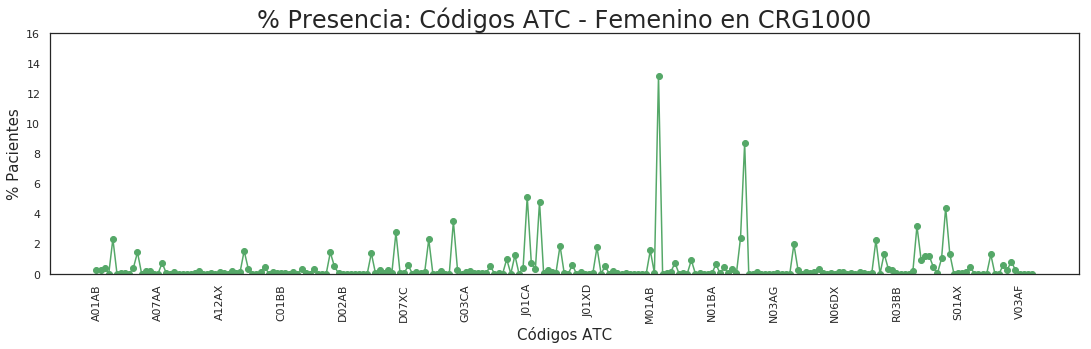

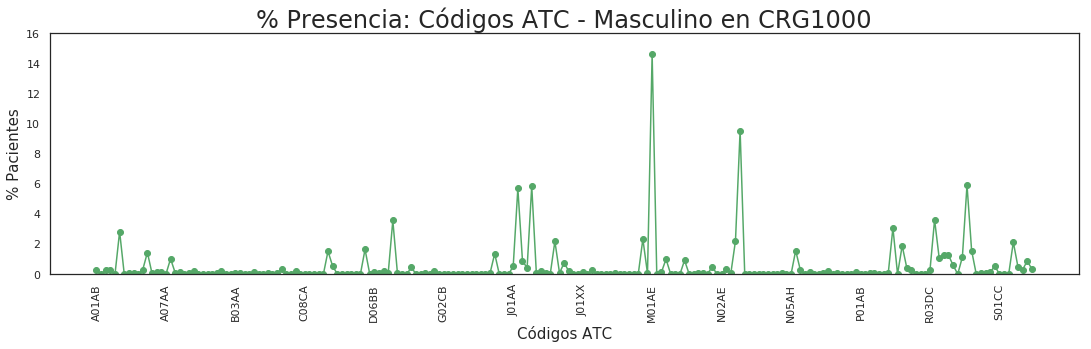

In [25]:
for g in columnas_genero:
    A = crg_1000_new_P[columnas_farmacia][crg_1000_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.tight_layout()
        plt.xticks(range(0, len(valor), 15), rotation=90)
        plt.ylim(0.0, 16.0)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Presencia: Códigos ATC - {} en CRG1000'.format(g))
        
        plt.savefig("pictures/CRG1000/CRG1000_P_ATC_{}.png".format(g))        
        plt.show()

In [26]:
for g in columnas_genero:
    A = crg_1000_new_P[columnas_farmacia][crg_1000_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
M01AE   13.169521
N02BE    8.698630
J01CA    5.126712
J01CR    4.784247
R06AX    4.390411
Grupos mayoritarios para Masculino
            Valor
Código           
M01AE   14.622837
N02BE    9.549259
R06AX    5.927716
J01CR    5.854504
J01CA    5.703199


# Multi clase

In [27]:
crg_1000_with_classes_O = pd.read_csv('../CRGs/datasets/matrix_CRG1000.csv')
crg_1000_with_classes_O['CRG1000'] = np.ones(N_Pacientes, dtype=int)
crg_1000_with_classes_O['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_O['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_O['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_O['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_O['M01AE'].describe()

count    46835.000000
mean         0.405978
std          0.776006
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         21.000000
Name: M01AE, dtype: float64

In [28]:
crg_1000_with_classes_O.to_csv('datasets/class/crg_1000_with_classes_O.csv', index=False)

In [31]:
crg_1000_with_classes_P = pd.concat([Edad, crg_1000[crg_1000.columns[1:2]], presencia], axis = 1)
crg_1000_with_classes_P['CRG1000'] = np.ones(N_Pacientes, dtype=int)
crg_1000_with_classes_P['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_P['CRG5424'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_P['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_P['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_1000_with_classes_P['M01AE'].describe()

count    46835.000000
mean         0.292153
std          0.454757
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: M01AE, dtype: float64

In [32]:
crg_1000_with_classes_P.to_csv('datasets/class/crg_1000_with_classes_P.csv', index=False)